# Explore here

In [9]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#esto lo que hace es pasarle nuestras credenciales a la API de Spotify
# y nos permite hacer peticiones a la API de Spotify

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# 76R7k5vuX8M7vBDv21DPCv TERE
# 5GGJosGMs08YEmKTZJe1fL Suki waterhouse

#obtener las mejores cacniones del artista
results = spotify.artist_top_tracks("76R7k5vuX8M7vBDv21DPCv")

songs = []
for track in results ['tracks']:
    songs.append({"name": track['name'], 
                  "popularity": track['popularity'], 
                  "duration_min": track['duration_ms']/60000})
df = pd.DataFrame(songs)

print(df)


                      name  popularity  duration_min
0     No Quiero Despedirme          24      2.673900
1                Entre Dos          15      3.501700
2  Cuál Se Lleva El Dolor?          12      3.338233
3       Lo Que Ve Un Ciego          11      3.745450
4          Maldito Orgullo           9      2.904750


<function matplotlib.pyplot.show(close=None, block=None)>

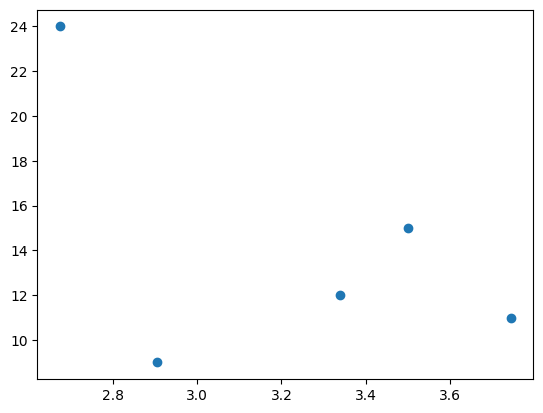

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['duration_min'], df['popularity'])
plt.show

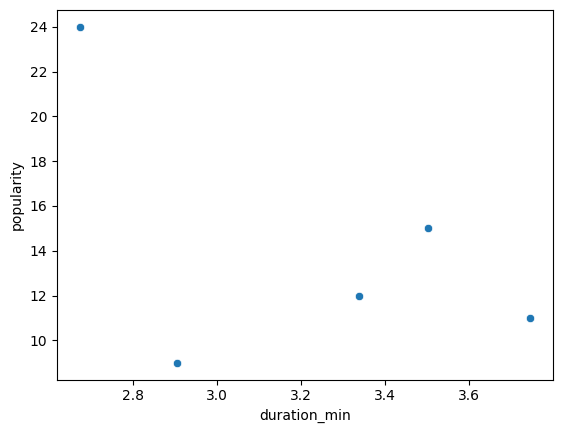

In [11]:
sns.scatterplot(df, x='duration_min', y='popularity')
plt.show()

Parte #2 Propuesta

In [24]:
track_ids = [track["uri"] for track in results["tracks"]]
features = spotify.audio_features(track_ids[0])
features

TypeError: string indices must be integers, not 'str'